# Họ tên: Nguyễn Hoàng Linh
# MSSV: 1712559

## File này được tạo ra với mục đích chính là để tiền xử lý dữ liệu và chọn 1 hướng đi phù hợp để phân tích

# Import

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Lấy dữ liệu

Dữ liệu được dùng trong đồ án này là 'merchants_origin.xlsx' và 'transactions_origin.xlsx'. Đây là dữ liệu về thông tin mua hàng với thẻ thanh toán trực tiếp tại các cửa hàng trên toàn quốc, bao gồm nhiều ngành hàng từ beverage, fnb đến food, csv,... trong giai đoạn từ ngày 31/07/2019 đến 31/08/2019

Dữ liệu này được lấy từ tập dữ liệu trong cuộc thi riêng về Machine Learning nên không có public dữ liệu trên kaggle và các nền tảng khác

# Khám phá dữ liệu

### Đọc dữ liệu vào dataframe

In [35]:
transaction = pd.read_excel("data/transactions_origin.xlsx",encoding = "utf-8")
transaction.head()

,timestamp,user_id,service_id,store_id,amount
0,1564592753302,8159657106479438377,1331731186241134178,3207118793767876135,85000
1,1564597378535,2327806852915118533,1564697347935602136,5011561505280801506,996000
2,1564598671091,6330202370451858563,2836984108500781008,6239691931360727075,190000
3,1564598946921,4731583744565285737,2836984108500781008,6239691931360727075,961000
4,1564604696061,3577123636812490249,5251647995811785396,8851448295329400252,1278000


In [72]:
data = pd.read_excel("data/merchants_origin.xlsx",encoding = "utf-8")
data.head()

,service_id,store_id,service_group,merchant_name,merchant_address,store_name,store_address,store_longitude,store_latitude
0,1058241667815469540,249887925492461203,other offline payment services,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Nguyễn Trãi Cần Thơ,"41-41A-43 Nguyễn Trãi, Q. Ninh Kiều, Cần Thơ",105.785046,10.040508
1,1058241667815469540,6272474026035536581,other offline payment services,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Hậu Giang,"Số 410 Hậu Giang, Phường 12, Quận 6, Tp. HCM",106.638935,10.749251
2,8073873840719601655,2217087971996193230,beverage,HỘ KINH DOANH - QUÁCH THỊ HƯƠNG DUYÊN,"444 Hoàng Văn Thụ, Phường 2, Quận Tân Bình, Th...",Sharetea Hoàng Văn Thụ,"444 Hoàng Văn Thụ, Phường 4, Quận Tân Bình, Th...",106.655742,10.795501
3,1058241667815469540,7296552596579579660,other offline payment services,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Cách Mạng tháng 8 HCM,"Số 484 - 486 Cách Mạng Tháng Tám, Phường 11, Q...",106.668518,10.784919
4,1058241667815469540,4707467693322385152,other offline payment services,CÔNG TY CP TMDV TVTK THỜI TRANG VIỆT,"189A Hai Bà Trưng , P.6, Quận 3 TPHCM",Concept Vạnh Hạnh Mall,"TTTM,Số 11 Sư Vạn Hạnh, Đường 3/2, Phường 12, ...",106.669971,10.769976


### Dữ liệu có bao nhiêu dòng và cột?

In [11]:
num_rows, num_cols = transaction.shape
print('num_rows_transaction:', num_rows)
print('num_cols_transaction', num_cols)

num_rows_transaction: 1008720
num_cols_transaction 5


In [13]:
num_rows, num_cols = data.shape
print('num_rows_merchant_info:', num_rows)
print('num_cols_merchant_info', num_cols)

num_rows_merchant_info: 2973
num_cols_merchant_info 9


### Mỗi dòng có ý nghĩa gì?

+ Mỗi dòng của dữ liệu merchant ứng với thông tin của các cửa hàng trên Việt Nam có sử dụng ví điện tử thanh toán
+ Mỗi dòng của dữ liệu transaction ứng với thông tin của khách hàng mua tại cửa hàng theo thời gian với số tiền cụ thể
+ 2 dữ liệu được kết nối với nhau qua store_id và service_id

### Mỗi cột có ý nghĩa gì?

Merchant:
+ service_id: Mỗi service_id sẽ tương ứng với một loại cửa hàng nhất định
+ store_id  : Mỗi store_id tương ứng với 1 chi nhánh của cửa hàng
+ service_group: loại phục vụ (beverage, fnb)
+ merchant_name: Tên cửa hàng
+ merchant_address: Địa chỉ cửa hàng chính
+ store_name: Tên Chi nhánh
+ store_address: Địa chỉ chi nhánh
+ store_longitude, store_latitude: Kinh độ, Vĩ độ cửa hàng

Transaction:
+ timestamp: Thời gian thanh toán
+ user_id, service_id, store_id : id của người dùng, dịch vụ, cửa hàng, được kết nối với dữ liệu beverage
+ amount: Lượng tiền giao dịch

### Kiểu dữ liệu mỗi cột?

In [20]:
data.dtypes

service_id            int64
store_id              int64
service_group        object
merchant_name        object
merchant_address     object
store_name           object
store_address        object
store_longitude     float64
store_latitude      float64
dtype: object

In [15]:
transaction.dtypes

timestamp     int64
user_id       int64
service_id    int64
store_id      int64
amount        int64
dtype: object

Nhận xét:
+ Cột timestamp có type là object nên sẽ chuyển về dạng datetime

In [36]:
transaction.timestamp = pd.to_datetime(transaction.timestamp, unit = "ms")

### Miền giá trị của các cột dạng Numeric và Datetime

In [22]:
data.describe()

,service_id,store_id,store_longitude,store_latitude
count,2.973000e+03,2.973000e+03,2973.000000,2973.000000
mean,4.889768e+18,4.672982e+18,106.468063,13.927196
std,2.653304e+18,2.633505e+18,0.738107,4.957941
min,4.664854e+15,7.798959e+15,78.656894,9.178577
25%,2.180188e+18,2.415173e+18,105.849872,10.771504
50%,4.736618e+18,4.837531e+18,106.669690,10.801908
75%,7.241075e+18,6.912396e+18,106.700489,20.997706
max,9.208971e+18,9.223304e+18,113.866120,106.703569


In [30]:
transaction.describe()

,user_id,service_id,store_id,amount
count,1.008720e+06,1.008720e+06,1.008720e+06,1.008720e+06
mean,4.605686e+18,5.374688e+18,4.416860e+18,2.651468e+05
std,2.659094e+18,2.530739e+18,2.524191e+18,5.127195e+05
min,1.002355e+13,4.664854e+15,6.214594e+15,0.000000e+00
25%,2.301039e+18,3.398612e+18,1.747737e+18,3.600000e+04
50%,4.592490e+18,6.683160e+18,3.994338e+18,8.900000e+04
75%,6.902125e+18,7.341551e+18,7.022304e+18,2.410000e+05
max,9.223308e+18,9.208971e+18,9.223304e+18,1.923900e+07


In [37]:
print(transaction.timestamp.min(), transaction.timestamp.max())

2019-07-31 17:00:39.618000 2019-08-31 16:59:50.465000


# Tiền xử lý dữ liệu

### Giá trị Null

In [38]:
data.isna().sum()

service_id            0
store_id              0
service_group       199
merchant_name         0
merchant_address      1
store_name            0
store_address         0
store_longitude       0
store_latitude        0
dtype: int64

In [39]:
transaction.isna().sum()

timestamp     0
user_id       0
service_id    0
store_id      0
amount        0
dtype: int64

In [43]:
data[data.service_group.isnull()].head()

,service_id,store_id,service_group,merchant_name,merchant_address,store_name,store_address,store_longitude,store_latitude
10,8203460032407458181,3699924941261806407,NaN,CÔNG TY TNHH ĐẦU TƯ VÀ PHÁT TRIỂN BẦU TRỜI XANH,"124 Đường Trần Não, Khu phố 2, phường Bình An,...",3Sạch Tresor,"39-39B Bến Vân Đồn, Phường 12, Quận 4, Thành P...",106.703402,10.766887
14,8203460032407458181,5560552259059895242,NaN,CÔNG TY TNHH ĐẦU TƯ VÀ PHÁT TRIỂN BẦU TRỜI XANH,"124 Đường Trần Não, Khu phố 2, phường Bình An,...",3Sạch Vinhomes Park 1,"720A Điện Biên Phủ, Phường 22, Quận Bình Thạnh...",106.722098,10.791140
19,6573947514783036540,2924007050849236074,NaN,Công Ty CP Những Hạt Cà Phê Nói Chuyện,"29 ngõ 93 phố Vũ Hữu Khuất Duy Tiến, Phường T...",TWTTER BEANS COFFEE HOLA,"Khu DV04 khu CNC Láng Hòa Lạc, Xã Thạch Hoà, H...",105.531082,21.007833
28,6573947514783036540,6612695632743857561,NaN,Công Ty CP Những Hạt Cà Phê Nói Chuyện,"29 ngõ 93 phố Vũ Hữu Khuất Duy Tiến, Phường T...",TWTTER BEANS COFFEE MĐI1,"Tầng 1, tòa nhà Golden Field 24 Nguyễn Cơ Thạc...",105.765708,21.035161
41,6573947514783036540,4540151790580534769,NaN,Công Ty CP Những Hạt Cà Phê Nói Chuyện,"29 ngõ 93 phố Vũ Hữu Khuất Duy Tiến, Phường T...",TWTTER BEANS COFFEE ANBI,"Tầng 1, Tòa A5, An Bình City, 234 Phạm Văn Đồn...",105.778327,21.050210


Những giá trị bị thiếu có thể do cửa chưa đăng ký tên dịch vụ hoặc trong quá trình ghi nhận dữ liệu có vấn đề. Vì số dữ liệu bị thiếu ít nên ta sẽ thêm bằng tay (hand-craft)

### Dữ liệu Outlier

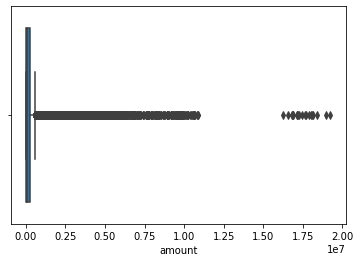

In [64]:
sns.boxplot(y="amount", data=transaction,orient="h")

Nhìn qua biểu đồ, ta thấy rằng dữ liệu amount > 12.5 triệu có vấn đề nên ta sẽ xoá dữ liệu đó đi

In [65]:
transaction.drop(transaction[transaction.amount > 12500000].index, inplace = True)

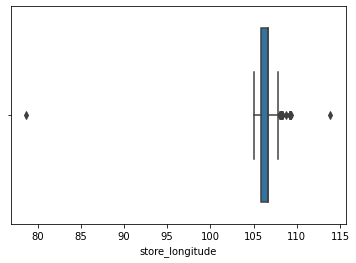

In [67]:
sns.boxplot(y="store_longitude", data=data,orient="h")

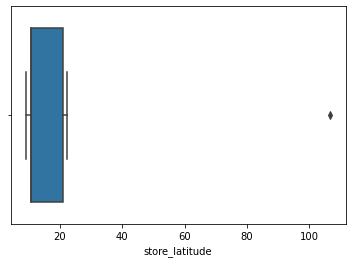

In [68]:
sns.boxplot(y="store_latitude", data=data,orient="h")

Tương tự đối với longitude và latitude. Và tất nhiên theo địa lý Việt Nam, ta sẽ chỉ chọn toạ độ từ (106.550, 10.68) đến (106.85, 10.9)

In [73]:
data.drop(data[data.store_longitude < 106.550].index, inplace = True)
data.drop(data[data.store_longitude > 106.85].index, inplace = True)
data.drop(data[data.store_latitude < 10.68].index, inplace = True)
data.drop(data[data.store_latitude > 10.9].index, inplace = True)

## Tiếp theo, ta đến bước lựa chọn dữ liệu để phân tích

In [78]:
data.service_group.unique()

array(['other offline payment services', 'beverage', nan, 'food', 'fnb',
       'shopping', 'cvs', 'supermarket'], dtype=object)

Ta thấy rằng có 6 ngành hàng chính: beverage, food, fnb, shopping, cvs, supermarket. Những dữ liệu other offline payment services và giá trị null sẽ được thêm sau qua việc xử lý tay
+ Và tất nhiên, mục đích chính của ta là xem và theo dõi ngành hàng nào phổ biến nhất để từ đó có thể phân tích dữ liệu riêng biệt cho ngành đó

In [0]:
plot_data = transaction.groupby("service_group").count()
plot_data.sort_values(by=["amount"],inplace = True,ascending = False)
plot_data

,timestamp,user_id,service_id,store_id,amount
service_group,,,,,
fnb,304773,304773,304773,304773,304773
cvs,290361,290361,290361,290361,290361
beverage,187745,187745,187745,187745,187745
food,74114,74114,74114,74114,74114
supermarket,45774,45774,45774,45774,45774
other,22988,22988,22988,22988,22988
shopping,7027,7027,7027,7027,7027


In [0]:
temp = plot_data.values[2].copy()
plot_data.values[2] = plot_data.values[1]
plot_data.values[1] = temp
plot_data.index.values[1]= "beverage"
plot_data.index.values[2]= "cvs"
plot_data

,timestamp,user_id,service_id,store_id,amount
service_group,,,,,
fnb,304773,304773,304773,304773,304773
beverage,187745,187745,187745,187745,187745
cvs,290361,290361,290361,290361,290361
food,74114,74114,74114,74114,74114
supermarket,45774,45774,45774,45774,45774
other,22988,22988,22988,22988,22988
shopping,7027,7027,7027,7027,7027


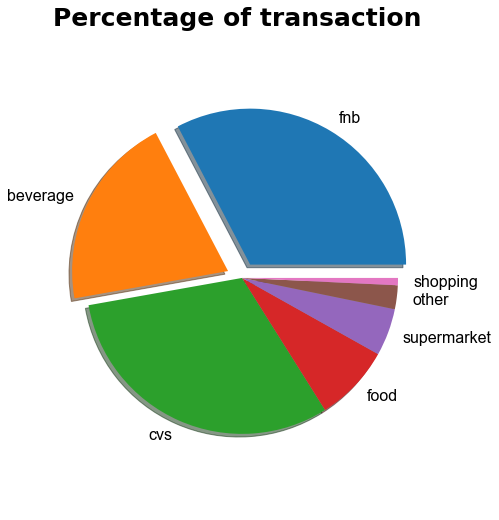

In [0]:
explode = (0.1, 0.1, 0, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(plot_data.amount, explode=explode, labels=plot_data.index,textprops={'fontsize': 16, 'fontname':'Arial'},
        shadow=True, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
fig1.set_facecolor('white')
ax1.grid(False)
plt.style.use('ggplot')
plt.title("Percentage of transaction", fontdict = {'fontsize': 25,'fontweight': 'bold','verticalalignment': 'baseline',
                                                  'horizontalalignment':"center",'verticalalignment':"top"})
plt.show()

Tại đây, ta thấy rằng beverage và fnb chiếm hơn 50% tổng số giao dịch (Transaction) trong tất cả các ngành hàng. Và tất nhiên giả thuyết đầu tiên của ta là ngành beverage và fnb phổ biến nhất trong tất cả, do đó, để thuyết phục hơn ta sẽ xem xét đến timeline của từng ngành hàng và tình hình giao dịch như thế nào

### Xem xét từng ngành hàng theo thời gian

In [0]:
transaction.timestamp = pd.to_datetime(transaction.timestamp,unit="ms")
transaction.sort_values(by=["timestamp"],inplace = True)
transaction

,timestamp,user_id,service_id,store_id,amount,service_group
486868,2019-07-31 17:00:39.618,6999581588594699050,7241075282237721387,1712443322607324267,140000,cvs
17847,2019-07-31 17:00:39.618,7293786319251451286,2976045368419517725,4233306449914465238,215000,food
656801,2019-07-31 17:00:45.023,4320011930735144769,7241075282237721387,1712443322607324267,10000,cvs
892511,2019-07-31 17:00:45.023,1348116226867379701,5118073894352076666,4478031251223671327,46000,fnb
337481,2019-07-31 17:00:45.023,3915875167744147029,4730332944869925968,9016913884991478105,117000,beverage
...,...,...,...,...,...,...
676071,2019-08-31 16:58:47.262,7151211157479363488,7549210150399079702,3181081454660562065,31000,fnb
814380,2019-08-31 16:58:47.262,8225380512973076942,7435641053063427914,3381320566892266107,27000,cvs
687038,2019-08-31 16:59:40.088,2050835819433442914,7241075282237721387,1712443322607324267,20000,cvs
952723,2019-08-31 16:59:41.480,967483949277839142,7435641053063427914,3381320566892266107,55000,cvs


In [0]:
temp = pd.DataFrame(columns = ["day","month","year"])
temp.year = transaction.timestamp.dt.year
temp.month = transaction.timestamp.dt.month
temp.day = transaction.timestamp.dt.day
temp

,day,month,year
0,31,7,2019
1,31,7,2019
2,31,7,2019
3,31,7,2019
4,31,7,2019
...,...,...,...
1008715,31,8,2019
1008716,31,8,2019
1008717,31,8,2019
1008718,31,8,2019


In [0]:
transaction["Time"] = pd.to_datetime(temp)
transaction

,timestamp,user_id,service_id,store_id,amount,service_group,Time
0,2019-07-31 17:00:39.618,6999581588594699050,7241075282237721387,1712443322607324267,140000,cvs,2019-07-31
1,2019-07-31 17:00:39.618,7293786319251451286,2976045368419517725,4233306449914465238,215000,food,2019-07-31
2,2019-07-31 17:00:45.023,4320011930735144769,7241075282237721387,1712443322607324267,10000,cvs,2019-07-31
3,2019-07-31 17:00:45.023,1348116226867379701,5118073894352076666,4478031251223671327,46000,fnb,2019-07-31
4,2019-07-31 17:00:45.023,3915875167744147029,4730332944869925968,9016913884991478105,117000,beverage,2019-07-31
...,...,...,...,...,...,...,...
1008715,2019-08-31 16:58:47.262,7151211157479363488,7549210150399079702,3181081454660562065,31000,fnb,2019-08-31
1008716,2019-08-31 16:58:47.262,8225380512973076942,7435641053063427914,3381320566892266107,27000,cvs,2019-08-31
1008717,2019-08-31 16:59:40.088,2050835819433442914,7241075282237721387,1712443322607324267,20000,cvs,2019-08-31
1008718,2019-08-31 16:59:41.480,967483949277839142,7435641053063427914,3381320566892266107,55000,cvs,2019-08-31


In [0]:
transaction.drop(columns = "Time",inplace = True)
transaction.service_id = transaction.service_id.astype(str)
transaction.store_id = transaction.store_id.astype(str)
transaction.timestamp = transaction.timestamp.astype(str)
transaction.user_id = transaction.user_id.astype(str)
transaction.to_csv("new_transaction.csv",encoding = "utf-8",index= False)

In [0]:
transaction_food = transaction[transaction.service_group == "food"]
transaction_cvs = transaction[transaction.service_group == "cvs"]
transaction_supermarket = transaction[transaction.service_group == "supermarket"]
transaction_shopping = transaction[transaction.service_group == "shopping"]
transaction_other = transaction[transaction.service_group == "other"]

plot_data_food = transaction_food.groupby("Time").count()
plot_data_cvs = transaction_cvs.groupby("Time").count()
plot_data_supermarket = transaction_supermarket.groupby("Time").count()
plot_data_shopping = transaction_shopping.groupby("Time").count()
plot_data_other = transaction_other.groupby("Time").count()

In [0]:
plot_data_food.service_group = "food"
plot_data_cvs.service_group = "cvs"
plot_data_supermarket.service_group = "supermarket"
plot_data_shopping.service_group = "shopping"
plot_data_other.service_group = "other"
plot_data_beverage.service_group = "beverage"

In [0]:
transaction_beverage = pd.concat([transaction[transaction.service_group == "beverage"],transaction[transaction.service_group == "fnb"]],ignore_index=True)
plot_data_beverage = transaction_beverage.groupby("Time").count()
plot_data_beverage.head()

,timestamp,user_id,service_id,store_id,amount,service_group
Time,,,,,,
07-31,489,489,489,489,489,489
08-01,17308,17308,17308,17308,17308,17308
08-02,27748,27748,27748,27748,27748,27748
08-03,25262,25262,25262,25262,25262,25262
08-04,12310,12310,12310,12310,12310,12310


In [0]:
plot_data = pd.concat([plot_data_food,plot_data_cvs,plot_data_supermarket,plot_data_shopping,plot_data_other,plot_data_beverage])
plot_data.sort_values(by=["service_group"],inplace = True)
plot_data

,timestamp,user_id,service_id,store_id,amount,service_group
Time,,,,,,
08-31,14899,14899,14899,14899,14899,beverage
07-31,489,489,489,489,489,beverage
08-01,17308,17308,17308,17308,17308,beverage
08-02,27748,27748,27748,27748,27748,beverage
08-03,25262,25262,25262,25262,25262,beverage
...,...,...,...,...,...,...
08-27,1273,1273,1273,1273,1273,supermarket
08-28,712,712,712,712,712,supermarket
08-29,606,606,606,606,606,supermarket


Text(0, 0.5, 'Count')

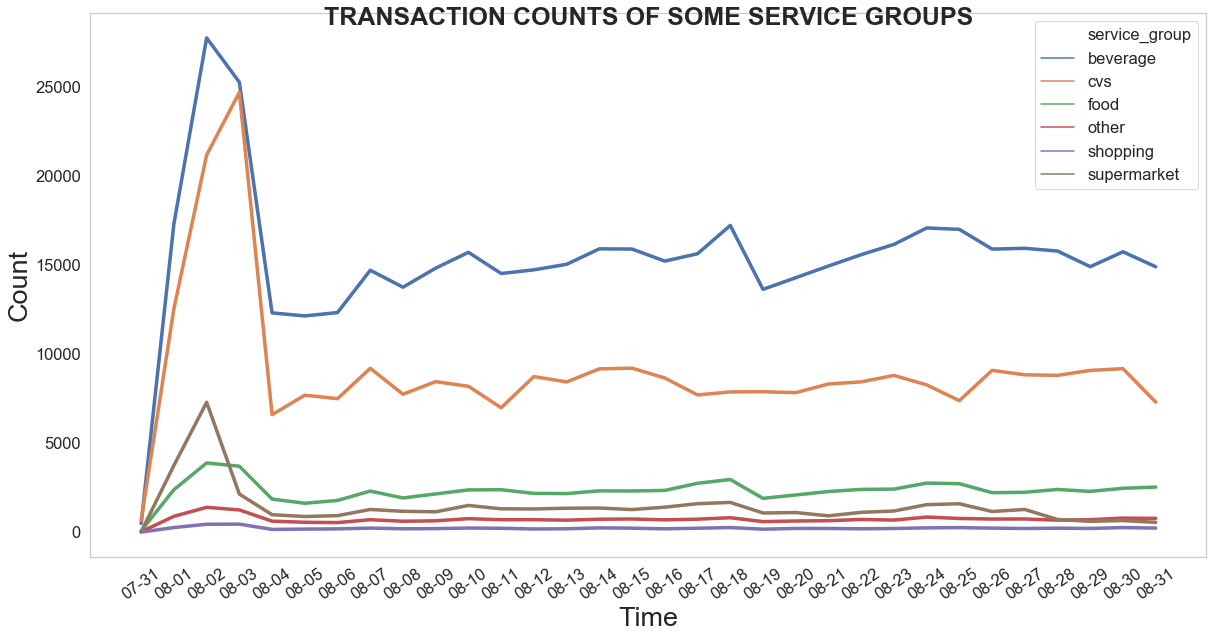

In [0]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=35)
plt.title('TRANSACTION COUNTS OF SOME SERVICE GROUPS',fontdict = {'fontsize': 25,'fontweight': 'bold','verticalalignment': 'baseline',
                                                  'horizontalalignment':"center",'verticalalignment':"top"})

sns.set_style("whitegrid", {'axes.grid' : False})
b=sns.lineplot(x=plot_data.index,y="amount",hue = "service_group",data=plot_data,color="coral",markers=True,
            lw=3.5)

b.set_xlabel("Time",fontsize=27)
b.set_ylabel("Count",fontsize=27)

Ta có thể đưa ra nhận xét rằng beverage vẫn chiếm đa số trong các ngành hàng trong toàn bộ timeline. Nhưng mà tuy nhiên, số giao dịch nhiều nhưng giao dịch với số tiền bao nhiêu?

### Xem xét từng ngành hàng theo doanh số bán hàng

In [0]:
transaction_food = transaction[transaction.service_group == "food"]
transaction_cvs = transaction[transaction.service_group == "cvs"]
transaction_supermarket = transaction[transaction.service_group == "supermarket"]
transaction_shopping = transaction[transaction.service_group == "shopping"]
transaction_other = transaction[transaction.service_group == "other"]

plot_data_food = transaction_food.groupby("Time").sum()
plot_data_cvs = transaction_cvs.groupby("Time").sum()
plot_data_supermarket = transaction_supermarket.groupby("Time").sum()
plot_data_shopping = transaction_shopping.groupby("Time").sum()
plot_data_other = transaction_other.groupby("Time").sum()

In [0]:
transaction_beverage = pd.concat([transaction[transaction.service_group == "beverage"],transaction[transaction.service_group == "fnb"]],ignore_index=True)
plot_data_beverage = transaction_beverage.groupby("Time").sum()
plot_data_beverage.head()

,user_id,service_id,store_id,amount
Time,,,,
07-31,2.304817e+21,2.249525e+21,2.265074e+21,1.773050e+08
08-01,7.977858e+22,8.218744e+22,8.298088e+22,6.580689e+09
08-02,1.279920e+23,1.311410e+23,1.323638e+23,1.103566e+10
08-03,1.158746e+23,1.193909e+23,1.202135e+23,9.895405e+09
08-04,5.650144e+22,5.920991e+22,6.030370e+22,4.105184e+09


In [0]:
plot_data_food["service_group"] = "food"
plot_data_cvs["service_group"] = "cvs"
plot_data_supermarket["service_group"] = "supermarket"
plot_data_shopping["service_group"] = "shopping"
plot_data_other["service_group"] = "other"
plot_data_beverage["service_group"] = "beverage"

In [0]:
plot_data = pd.concat([plot_data_food,plot_data_cvs,plot_data_supermarket,plot_data_shopping,plot_data_other,plot_data_beverage])
plot_data.sort_values(by=["service_group"],inplace = True)
plot_data

,user_id,service_id,store_id,amount,service_group
Time,,,,,
08-31,6.889184e+22,7.221636e+22,7.289535e+22,4.872148e+09,beverage
07-31,2.304817e+21,2.249525e+21,2.265074e+21,1.773050e+08,beverage
08-01,7.977858e+22,8.218744e+22,8.298088e+22,6.580689e+09,beverage
08-02,1.279920e+23,1.311410e+23,1.323638e+23,1.103566e+10,beverage
08-03,1.158746e+23,1.193909e+23,1.202135e+23,9.895405e+09,beverage
...,...,...,...,...,...
08-27,5.801437e+21,3.198943e+21,5.501850e+21,2.946060e+08,supermarket
08-28,3.229226e+21,2.519140e+21,3.302148e+21,2.098920e+08,supermarket
08-29,2.827578e+21,2.226767e+21,2.991353e+21,1.624570e+08,supermarket


Text(0, 0.5, 'Amount')

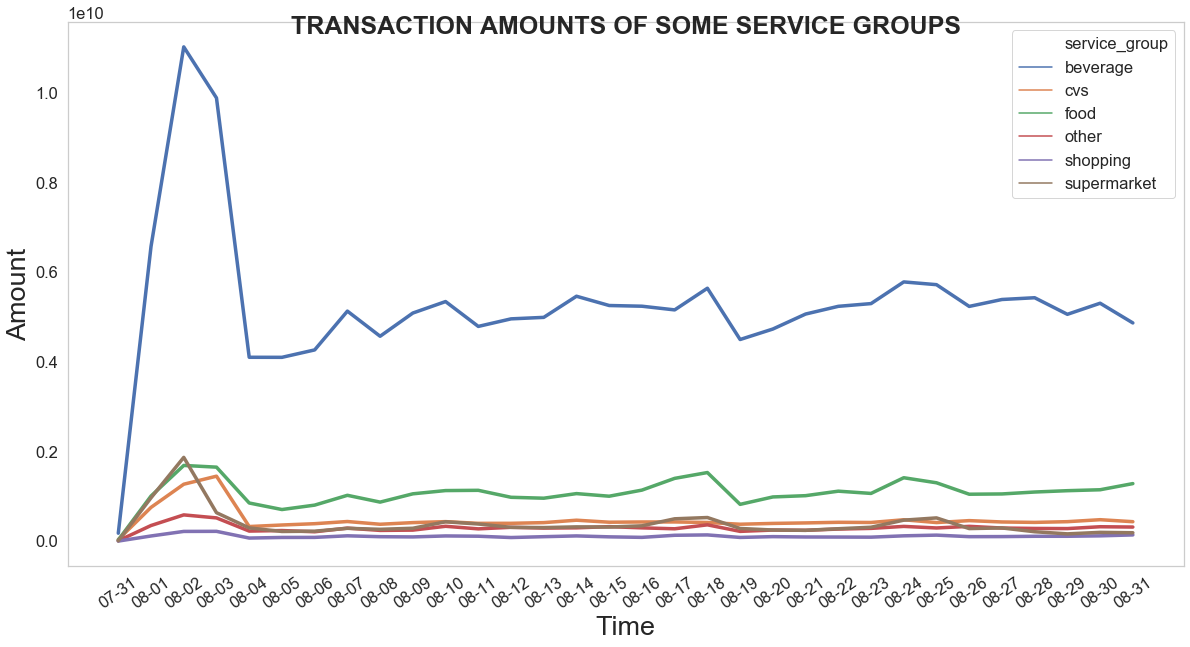

In [0]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=35)
plt.title('TRANSACTION AMOUNTS OF SOME SERVICE GROUPS',fontdict = {'fontsize': 25,'fontweight': 'bold','verticalalignment': 'baseline',
                                                  'horizontalalignment':"center",'verticalalignment':"top"})
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
b=sns.lineplot(x=plot_data.index,y="amount",hue = "service_group",data=plot_data,color="coral",markers=True,
            lw=3.5)

b.set_xlabel("Time",fontsize=27)
b.set_ylabel("Amount",fontsize=27)

Tại đây, ta có thể thuyết phục rằng, beverage không những có số giao dịch nhiều nhất mà còn có doanh số bán hàng cao nhất (lên đến tỷ đồng mỗi ngày). Do đó, ta sẽ chọn hướng đi phân tích hẹp cho ngành beverage này

# Cuối cùng, ta đưa ra kết luận rằng, số lượng giao dịch diễn ra đối với mặt hàng beverage(nước uống) diễn ra nhiều nhất nên ta sẽ chọn việc phân tích chủ yếu về loại mặt hàng này

Tại notebook tiếp theo, ta sẽ sử dụng dữ liệu beverage và transaction_beverage đã qua tiền xử lý để khám phá dữ liệu về ngành hàng beverage này. Về phần tiền xử lý, dữ liệu đa phần được xử lý bằng tay và một số bằng code (tốn nhiều thời gian do lượng dữ liệu lên đến 1 triệu dòng)